In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Caricamento e gestione del dataset sulla fertilità
fertility_ds = pd.read_csv('../../resources/fertility_rate.csv')

fertility_ds = fertility_ds.filter(items=['Country or Area', 'Year(s)', 'Value'])
fertility_ds = fertility_ds[fertility_ds['Year(s)'] >= 1999]
fertility_ds

,Country or Area,Year(s),Value
0,ADB region: Central and West Asia,2023,3.5252
1,ADB region: Central and West Asia,2020,3.6272
2,ADB region: Central and West Asia,2017,3.6671
3,ADB region: Central and West Asia,2014,3.7965
4,ADB region: Central and West Asia,2011,3.9217
...,...,...,...
6098,Zimbabwe,2011,4.1264
6099,Zimbabwe,2008,3.7826
6100,Zimbabwe,2005,3.6933
6101,Zimbabwe,2002,3.9249


In [3]:
fertility_ds_continents = fertility_ds[(fertility_ds['Country or Area'] == 'Asia') | (fertility_ds['Country or Area'] == 'Africa') | (fertility_ds['Country or Area'] == 'Europe') | (fertility_ds['Country or Area'] == 'Northern America') | (fertility_ds['Country or Area'] == 'South America') | (fertility_ds['Country or Area'] == 'Oceania')]
fertility_ds_continents

,Country or Area,Year(s),Value
77,Africa,2023,4.0718
78,Africa,2020,4.2423
79,Africa,2017,4.4822
80,Africa,2014,4.6862
81,Africa,2011,4.8417
82,Africa,2008,4.9677
83,Africa,2005,5.0400
84,Africa,2002,5.1147
85,Africa,1999,5.2480
308,Asia,2023,1.8809


In [4]:
fertility_ds_continents['Country or Area'].unique()

array(['Africa', 'Asia', 'Europe', 'Northern America', 'Oceania',
       'South America'], dtype=object)

Iniziamo con il fare una comparazione fra il 1999 ed il 2023 sulla variazione della fertilità a seconda del continente:

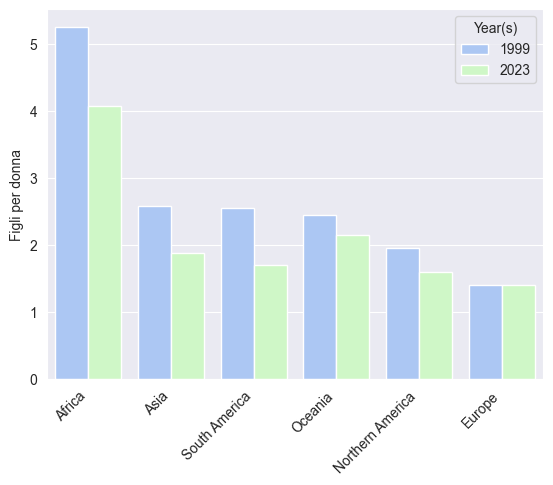

In [5]:
fertility_ds_continents_99and23 = fertility_ds_continents[(fertility_ds_continents['Year(s)'] == 1999) | (fertility_ds_continents['Year(s)'] == 2023)].sort_values(by='Value', ascending=False)
ax = sns.barplot(
    data=fertility_ds_continents_99and23,
    x='Country or Area',
    y='Value',
    hue='Year(s)',
    palette={1999: '#A0C4FF', 2023: '#CAFFBF'}
)
ax.set(xlabel=None)
plt.xticks(rotation=45, ha='right')
ax.set(ylabel='Figli per donna')
plt.show()

In [6]:
hdi = pd.read_csv('../../resources/human_development_index.csv', delimiter=';')
hdi

,Country,1990,2000,2010,2015,2019,2020,2021,2022
0,Switzerland,"0,850","0,885","0,940","0,952","0,960","0,957","0,965","0,967"
1,Norway,"0,845","0,914","0,938","0,952","0,961","0,963","0,964","0,966"
2,Iceland,"0,834","0,895","0,927","0,948","0,958","0,955","0,957","0,959"
3,"Hong Kong, China (SAR)","0,739","0,831","0,914","0,936","0,953","0,955","0,959","0,956"
4,Denmark,"0,839","0,890","0,913","0,936","0,946","0,946","0,947","0,952"
...,...,...,...,...,...,...,...,...,...
189,Niger,"0,212","0,260","0,336","0,367","0,390","0,391","0,389","0,394"
190,Central African Republic,"0,333","0,319","0,357","0,367","0,391","0,389","0,387","0,387"
191,South Sudan,..,..,"0,406","0,381","0,391","0,386","0,381","0,381"
192,Somalia,..,..,..,..,..,..,..,"0,380"


In [7]:
hdi_10years = hdi.filter(items=['Country', '1990', '2000', '2010', '2020'])
hdi_10years = pd.melt(hdi_10years, id_vars='Country', value_vars=['1990', '2000', '2010', '2020'], var_name='Year', value_name='Value')
hdi_10years

,Country,Year,Value
0,Switzerland,1990,"0,850"
1,Norway,1990,"0,845"
2,Iceland,1990,"0,834"
3,"Hong Kong, China (SAR)",1990,"0,739"
4,Denmark,1990,"0,839"
...,...,...,...
771,Niger,2020,"0,391"
772,Central African Republic,2020,"0,389"
773,South Sudan,2020,"0,386"
774,Somalia,2020,..


Trend del Human Index Development in Europa (campione preso osservando Italia, Francia, UK, Grecia, Spagna e Germania):

C:\Users\paioc\AppData\Local\Temp\ipykernel_8348\1415293264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_europe['Value'] = hdi_10years_europe['Value'].apply(convert_to_float)


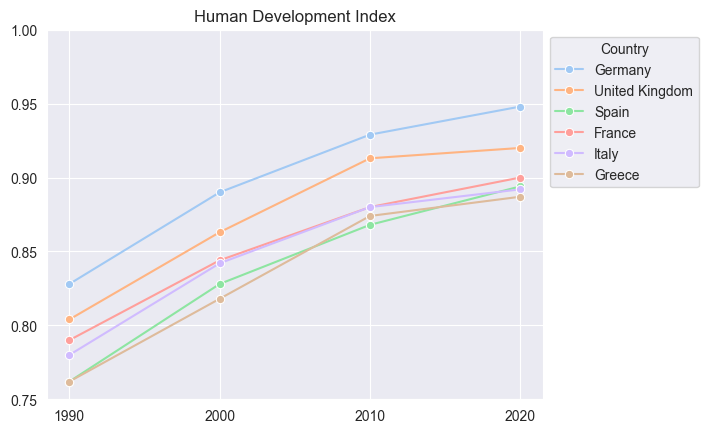

In [23]:
def convert_to_float(value: str) -> float:
    try:
        return float(value.replace(',', '.'))
    except ValueError:
        return float('nan')

hdi_10years_europe = hdi_10years[(hdi_10years['Country'] == 'Italy') | (hdi_10years['Country'] == 'France') | (hdi_10years['Country'] == 'Germany') | (hdi_10years['Country'] == 'Spain') | (hdi_10years['Country'] == 'United Kingdom') | (hdi_10years['Country'] == 'Greece')]
hdi_10years_europe['Value'] = hdi_10years_europe['Value'].apply(convert_to_float)
ax = sns.lineplot(
    data=hdi_10years_europe,
    x='Year',
    y='Value',
    hue='Country',
    palette='pastel',
    marker='o'
)
ax.set_title('Human Development Index')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks(np.arange(.75, 1.01, .05))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

Osservazione del HDI con alcuni casi specifici in vari continenti:

C:\Users\paioc\AppData\Local\Temp\ipykernel_8348\3078348177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_mixed['Value'] = hdi_10years_mixed['Value'].apply(convert_to_float)


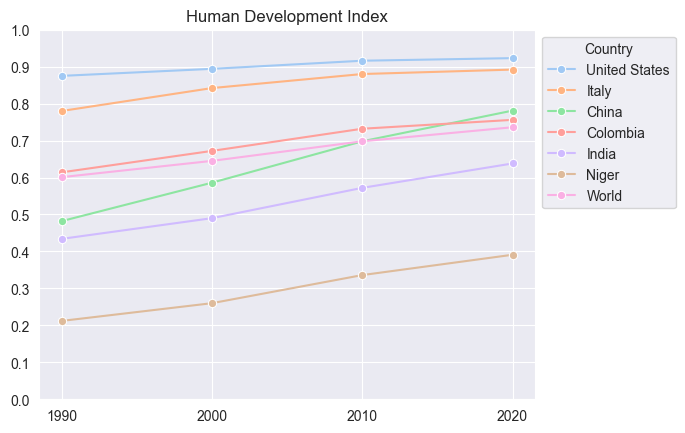

In [24]:
hdi_10years_mixed = hdi_10years[(hdi_10years['Country'] == 'China') | (hdi_10years['Country'] == 'India') | (hdi_10years['Country'] == 'Niger') | (hdi_10years['Country'] == 'Colombia') | (hdi_10years['Country'] == 'United States') | (hdi_10years['Country'] == 'Italy') | (hdi_10years['Country'] == 'World')]
hdi_10years_mixed['Value'] = hdi_10years_mixed['Value'].apply(convert_to_float)
ax = sns.lineplot(
    data=hdi_10years_mixed,
    x='Year',
    y='Value',
    hue='Country',
    palette='pastel',
    marker='o'
)
ax.set_title('Human Development Index')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks(np.arange(0, 1.01, .1))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()